In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage, ward, fcluster
from sklearn import metrics
from sklearn.decomposition import PCA
import altair as alt
from matplotlib import pyplot as plt
from skbio.stats.ordination import pcoa

alt.data_transformers.disable_max_rows()

%matplotlib inline

In [11]:
filepath = 'table_otu.tsv'
df = pd.read_csv(filepath, sep='\t',index_col=0,skiprows=1)
print(df.shape)
df.head()

(280, 47)


,recip.220.WT.OB1.D7,recip.290.ASO.OB2.D1,recip.389.WT.HC2.D21,recip.391.ASO.PD2.D14,recip.391.ASO.PD2.D21,recip.391.ASO.PD2.D7,recip.400.ASO.HC2.D14,recip.401.ASO.HC2.D7,recip.403.ASO.PD2.D21,recip.411.ASO.HC2.D14,...,recip.466.ASO.PD3.D7,recip.467.WT.HC3.D49.a,recip.467.WT.HC3.D49.b,recip.536.ASO.PD4.D49,recip.537.WT.PD4.D21,recip.538.WT.PD4.D21,recip.539.ASO.PD4.D14,recip.539.ASO.PD4.D7,recip.540.ASO.HC4.D14,recip.540.ASO.HC4.D7
#OTU ID,,,,,,,,,,,,,,,,,,,,,
04c8be5a3a6ba2d70446812e99318905,64.0,116.0,324.0,215.0,326.0,79.0,226.0,150.0,280.0,323.0,...,744.0,179.0,1217.0,1109.0,737.0,819.0,622.0,456.0,1044.0,860.0
ea2b0e4a93c24c6c3661cbe347f93b74,287.0,346.0,551.0,402.0,370.0,315.0,312.0,485.0,370.0,483.0,...,333.0,384.0,458.0,354.0,773.0,510.0,963.0,744.0,570.0,785.0
1ad289cd8f44e109fd95de0382c5b252,57.0,351.0,173.0,304.0,235.0,54.0,254.0,85.0,297.0,166.0,...,1579.0,21.0,455.0,481.0,966.0,792.0,1278.0,284.0,568.0,43.0
3d9838f12f6ff5591dbadeb427a855f1,302.0,718.0,804.0,418.0,736.0,643.0,646.0,375.0,686.0,602.0,...,0.0,578.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ac5402de1ddf427ab8d2b0a8a0a44f19,847.0,501.0,524.0,429.0,464.0,587.0,412.0,321.0,570.0,143.0,...,0.0,133.0,0.0,443.0,0.0,438.0,0.0,0.0,748.0,446.0


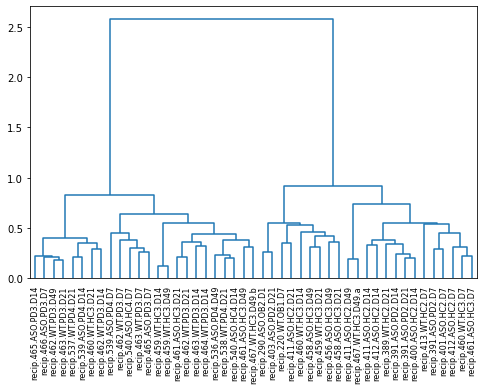

In [12]:
jsd_linear = distance.pdist(df.T,'jensenshannon')
jsd_squared = distance.squareform(jsd_linear)
Z = linkage(jsd_linear, method = 'ward' ,metric='jensenshannon')
fig = plt.figure(figsize=(8, 5))
dn = dendrogram(Z, color_threshold=0,labels=df.columns)

In [13]:
nclust = [i for i in range(2,11)]
clusterings = [fcluster(Z, clusters, criterion='maxclust') for clusters in nclust]
calhar_list = [metrics.calinski_harabasz_score(df.T,clustering) for clustering in clusterings]

clustering_df = pd.DataFrame({'n_clusters':nclust,
              'CH_index':calhar_list,
              'clusterings':clusterings})

clustering_df

,n_clusters,CH_index,clusterings
0,2,34.779456,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
1,3,21.318891,"[2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, ..."
2,4,21.199639,"[3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, ..."
3,5,18.341645,"[3, 3, 5, 5, 5, 5, 5, 5, 3, 5, 3, 4, 5, 5, 5, ..."
4,6,16.901921,"[4, 4, 6, 6, 6, 6, 6, 6, 4, 6, 4, 5, 6, 6, 6, ..."
5,7,14.326924,"[4, 4, 6, 6, 6, 7, 6, 7, 4, 6, 4, 5, 6, 7, 7, ..."
6,8,13.132113,"[5, 4, 7, 7, 7, 8, 7, 8, 4, 7, 5, 6, 7, 8, 8, ..."
7,9,11.955410,"[6, 5, 8, 8, 8, 9, 8, 9, 5, 8, 6, 7, 8, 9, 9, ..."
8,10,11.904911,"[6, 5, 8, 8, 8, 9, 8, 9, 5, 8, 6, 7, 8, 9, 10,..."


<AxesSubplot:xlabel='n_clusters'>

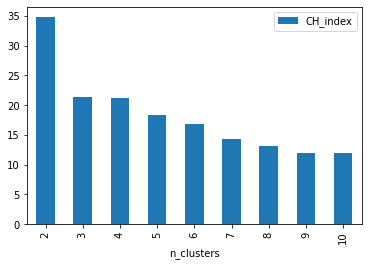

In [14]:
clustering_df.plot.bar(x='n_clusters',y=['CH_index'])

In [15]:
cl = clustering_df['clusterings'][clustering_df['CH_index'] == clustering_df['CH_index'].max()].values

In [16]:
pca = PCA(n_components=2)
pc = pd.DataFrame(pca.fit_transform(df.T),columns=['PC1', 'PC2'])
pc['cluster'] = cl[0]
pc['sample'] = df.columns

pcs = pd.DataFrame(pcoa(jsd_squared, number_of_dimensions=2).samples.values.tolist(), index=df.columns, columns=['PC1', 'PC2'])
pcs['cluster'] = cl[0]
pcs['sample'] = df.columns

In [17]:
pcoa_chart = alt.Chart(pcs).mark_circle(size=60).encode(
    x='PC1',
    y='PC2',
    color='cluster:N',
    tooltip=['PC1', 'PC2', 'cluster','sample']
).interactive().properties(
    title='PCoA'
)

pca_chart = alt.Chart(pc).mark_circle(size=60).encode(
    x='PC1',
    y='PC2',
    color='cluster:N',
    tooltip=['PC1', 'PC2', 'cluster','sample']
).interactive().properties(
    title='PCA'
)

bar_chart = alt.Chart(clustering_df).mark_bar().encode(
    x='n_clusters',
    y='CH_index',
    tooltip=['CH_index']
).interactive().properties(
    title='Clusters and Kal index'
)

In [18]:
chart = (pcoa_chart | pca_chart) & bar_chart
chart

alt.VConcatChart(...)

In [10]:
chart.save('chart.html')